In [1]:
# Importing the required libraries for data processing and machine learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression  # Logistic regression model for classification
from sklearn.tree import DecisionTreeClassifier  # Decision tree model for classification
from sklearn.ensemble import RandomForestClassifier  # Random forest model for classification
from sklearn.metrics import accuracy_score, classification_report  # For evaluating the model's performance

# Suppressing unnecessary warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the training and testing datasets
train_data = pd.read_csv('fraudTrain.csv')  # Read the training dataset
test_data = pd.read_csv('fraudTest.csv')  # Read the testing dataset

# Displaying dataset information to understand the structure and check for null values
train_data.info()  # Information about the training data (e.g., data types, number of entries)

print("\nNull values in training data:")
print(train_data.isnull().sum())  # Checking for any missing values in the training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [3]:
# Display the first 3 rows of the training data to get a sense of the structure
print("First 5 rows of the training data:")
train_data.head(5)

First 5 rows of the training data:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Checking the structure of the test dataset
test_data.info()  # Information about the testing data

print("\nNull values in testing data:")
print(test_data.isnull().sum())  # Checking for missing values in the testing dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
# Displaying the first 3 rows of the test dataset
print("First 5 rows of the testing data:")
test_data.head(5)

First 5 rows of the testing data:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
# Combining both training and testing datasets to preprocess and analyze them together
data = pd.concat([train_data, test_data])  # Concatenate the two datasets along the rows
print(f"Shape of the combined data: {data.shape}")  # Print the shape of the combined data

Shape of the combined data: (1852394, 23)


In [7]:
# Let's examine the correlation between each feature and the target feature (is_fraud)

# Dictionary to store correlation results
corr_result = {}

# Loop through each column to compute the correlation with the target feature 'is_fraud'
for col in data.columns:
    # Check if the column is numerical and not the target column 'is_fraud'
    if data[col].dtype != 'object' and col != 'is_fraud':
        # Calculate the correlation
        corr = data[col].corr(data['is_fraud'])
        corr_result[col] = corr  # Store the result in the dictionary

# Display the correlation results
print("Feature correlations with the target ('is_fraud'):")
corr_result

Feature correlations with the target ('is_fraud'):


{'Unnamed: 0': 0.0005238292595403058,
 'cc_num': -0.0011247864091594485,
 'amt': 0.2093078472297204,
 'zip': -0.002190364119647334,
 'lat': 0.002903941085080607,
 'long': 0.0010217606338494797,
 'city_pop': 0.00032519441062586795,
 'unix_time': -0.013328789485514903,
 'merch_lat': 0.002777992413388992,
 'merch_long': 0.0009994134859691098}

In [8]:
# Drop irrelevant columns from the dataset
data.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'gender', 
                   'street', 'job', 'dob', 'trans_num'], inplace=True)

# Check the structure of the updated dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    object 
 2   category    object 
 3   amt         float64
 4   city        object 
 5   state       object 
 6   zip         int64  
 7   lat         float64
 8   long        float64
 9   city_pop    int64  
 10  unix_time   int64  
 11  merch_lat   float64
 12  merch_long  float64
 13  is_fraud    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 212.0+ MB


In [9]:
# Check the distribution of the target variable 'is_fraud' (legitimate vs fraudulent)
print("Class distribution (Legitimate vs Fraud):")
print(data['is_fraud'].value_counts())

Class distribution (Legitimate vs Fraud):
is_fraud
0    1842743
1       9651
Name: count, dtype: int64


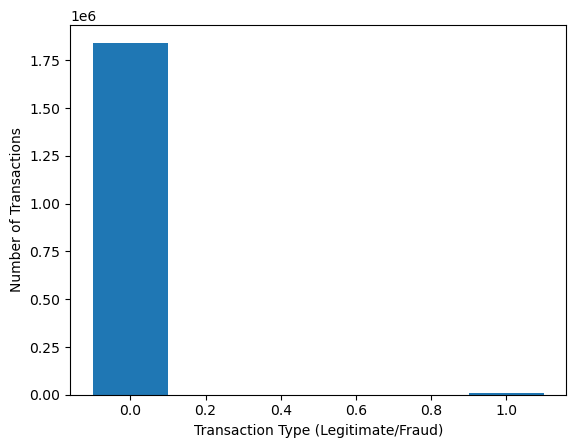

In [10]:
# Visualizing the class distribution
plt.bar(data['is_fraud'].unique(), data['is_fraud'].value_counts(), width=0.2)
plt.xlabel('Transaction Type (Legitimate/Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

In [11]:
# Separate the fraudulent and legitimate transactions
legitimate = data[data['is_fraud'] == 0]
fraud = data[data['is_fraud'] == 1]

# Randomly sample the same number of legitimate transactions as there are fraud transactions
legitimate = legitimate.sample(n=len(fraud))

# Check the shape of both datasets
print(f"Legitimate transactions: {legitimate.shape}")
print(f"Fraudulent transactions: {fraud.shape}")

Legitimate transactions: (9651, 14)
Fraudulent transactions: (9651, 14)


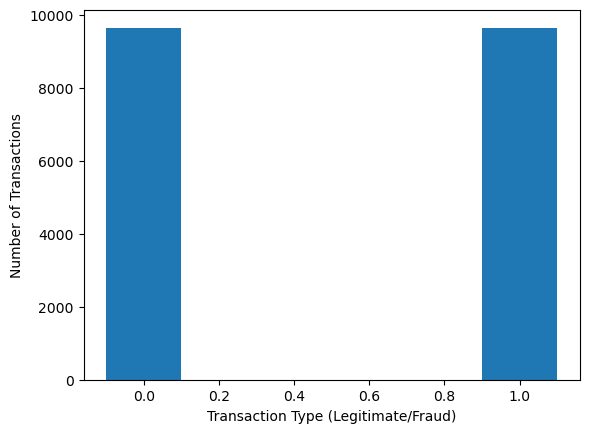

In [12]:
# Combine the balanced data (equal number of legitimate and fraudulent transactions)
data = pd.concat([legitimate, fraud])

# Visualize the new class distribution after balancing
plt.bar(data['is_fraud'].unique(), data['is_fraud'].value_counts(), width=0.2)
plt.xlabel('Transaction Type (Legitimate/Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

In [13]:
# Encoding categorical columns using LabelEncoder to convert them into numerical format
le = LabelEncoder()

# Apply LabelEncoder to the categorical columns
data['merchant'] = le.fit_transform(data['merchant'])
data['category'] = le.fit_transform(data['category'])
data['city'] = le.fit_transform(data['city'])
data['state'] = le.fit_transform(data['state'])

# Check the structure of the data after encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 293924 to 517571
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      19302 non-null  int64  
 1   merchant    19302 non-null  int32  
 2   category    19302 non-null  int32  
 3   amt         19302 non-null  float64
 4   city        19302 non-null  int32  
 5   state       19302 non-null  int32  
 6   zip         19302 non-null  int64  
 7   lat         19302 non-null  float64
 8   long        19302 non-null  float64
 9   city_pop    19302 non-null  int64  
 10  unix_time   19302 non-null  int64  
 11  merch_lat   19302 non-null  float64
 12  merch_long  19302 non-null  float64
 13  is_fraud    19302 non-null  int64  
dtypes: float64(5), int32(4), int64(5)
memory usage: 1.9 MB


In [14]:
# Separate the features (X) and the target (y)
# X contains all columns except the target column 'is_fraud'
# y contains the target variable 'is_fraud'
x_data = data.iloc[:, :-1].values  # Features
y_data = data.iloc[:, -1].values   # Target variable

# Split the data into training and testing sets
# The data is shuffled to ensure both fraud and legitimate transactions are represented in both training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42, shuffle=True)

# Initialize and train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [15]:
# Predict the target on the training data
log_pred = log_reg.predict(x_train)

# Evaluate the Logistic Regression model performance
print("Logistic Regression - Training Accuracy:", round(accuracy_score(y_train, log_pred), 3))
print("Logistic Regression - Classification Report:\n", classification_report(y_train, log_pred))

Logistic Regression - Training Accuracy: 0.5
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6756
           1       0.50      1.00      0.67      6755

    accuracy                           0.50     13511
   macro avg       0.25      0.50      0.33     13511
weighted avg       0.25      0.50      0.33     13511



In [16]:
# Initialize and train a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
# Predict the target on the training data
dt_pred = dt.predict(x_train)

# Evaluate the Decision Tree model performance
print("Decision Tree - Training Accuracy:", round(accuracy_score(y_train, dt_pred), 3))
print("Decision Tree - Classification Report:\n", classification_report(y_train, dt_pred))

Decision Tree - Training Accuracy: 1.0
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



In [18]:
# Initialize and train a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [19]:
# Predict the target on the training data
rfc_pred = rfc.predict(x_train)

# Evaluate the Random Forest model performance
print("Random Forest - Training Accuracy:", round(accuracy_score(y_train, rfc_pred), 3))
print("Random Forest - Classification Report:\n", classification_report(y_train, rfc_pred))

Random Forest - Training Accuracy: 1.0
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



In [20]:
# Evaluate the models on the testing data (unseen data)
test_pred = log_reg.predict(x_test)

# Evaluate the Logistic Regression model on the test data
print("Logistic Regression - Testing Accuracy:", round(accuracy_score(y_test, test_pred), 3))
print("Logistic Regression - Classification Report:\n", classification_report(y_test, test_pred))

Logistic Regression - Testing Accuracy: 0.5
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2895
           1       0.50      1.00      0.67      2896

    accuracy                           0.50      5791
   macro avg       0.25      0.50      0.33      5791
weighted avg       0.25      0.50      0.33      5791

